# 마운트 및 데이터 로드

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip -q /content/gdrive/MyDrive/temp/electrolytic_degreasing_data.zip -d ./

# 일별 에러 로트 리스트

In [3]:
import os
import pandas as pd

path = '/content/data'

In [4]:
os.path.join(path, 'Error Lot list.csv')

'/content/data/Error Lot list.csv'

In [5]:
Error_Lot_df = pd.read_csv(os.path.join(path, 'Error Lot list.csv'))
Error_Lot_df

,Index,Date,LoT,LoT2
0,1,2021-09-06,NaN,NaN
1,2,2021-09-07,13.0,NaN
2,3,2021-09-08,1.0,22.0
3,4,2021-09-09,NaN,NaN
4,5,2021-09-10,NaN,NaN
5,6,2021-09-13,NaN,NaN
6,7,2021-09-14,5.0,NaN
7,8,2021-09-15,5.0,NaN
8,9,2021-09-16,NaN,NaN
9,10,2021-09-17,NaN,NaN


In [6]:
Error_Lot_df.loc[:,['Date','LoT','LoT2']]

,Date,LoT,LoT2
0,2021-09-06,NaN,NaN
1,2021-09-07,13.0,NaN
2,2021-09-08,1.0,22.0
3,2021-09-09,NaN,NaN
4,2021-09-10,NaN,NaN
5,2021-09-13,NaN,NaN
6,2021-09-14,5.0,NaN
7,2021-09-15,5.0,NaN
8,2021-09-16,NaN,NaN
9,2021-09-17,NaN,NaN


In [7]:
Error_count_df = Error_Lot_df.loc[:,['Date','LoT','LoT2']].groupby(by=['Date']).count().reset_index()

In [8]:
Error_Lot_df['Count'] = Error_count_df['LoT'] + Error_count_df['LoT2']

In [9]:
Error_Lot_df.head()

,Index,Date,LoT,LoT2,Count
0,1,2021-09-06,NaN,NaN,0
1,2,2021-09-07,13.0,NaN,1
2,3,2021-09-08,1.0,22.0,2
3,4,2021-09-09,NaN,NaN,0
4,5,2021-09-10,NaN,NaN,0


In [10]:
Error_Lot_df.fillna(0, inplace=True)

In [11]:
Error_Lot_df.head()

,Index,Date,LoT,LoT2,Count
0,1,2021-09-06,0.0,0.0,0
1,2,2021-09-07,13.0,0.0,1
2,3,2021-09-08,1.0,22.0,2
3,4,2021-09-09,0.0,0.0,0
4,5,2021-09-10,0.0,0.0,0


In [12]:
Error_Lot_df = Error_Lot_df.astype({'LoT':int, 'LoT2':int})

In [13]:
Error_Lot_df.head()

,Index,Date,LoT,LoT2,Count
0,1,2021-09-06,0,0,0
1,2,2021-09-07,13,0,1
2,3,2021-09-08,1,22,2
3,4,2021-09-09,0,0,0
4,5,2021-09-10,0,0,0


In [14]:
Error_list = []

for idx in range(len(Error_Lot_df)):
  Error_list.append([i for i in list(Error_Lot_df.iloc[idx, [2,3]]) if i!=0])
print(Error_list)

[[], [13], [1, 22], [], [], [], [5], [5], [], [], [13], [], [], [], [9], [], [8], [17], [19], [], [14], [], [], [], [], [5, 22], [], [], [], [], [19], [15], []]


# 센서 데이터 라벨링

In [15]:
path_list = os.listdir(path)
path_list.remove('Error Lot list.csv')
path_list.sort()
path_list

['kemp-abh-sensor-2021.09.06.csv',
 'kemp-abh-sensor-2021.09.07.csv',
 'kemp-abh-sensor-2021.09.08.csv',
 'kemp-abh-sensor-2021.09.09.csv',
 'kemp-abh-sensor-2021.09.10.csv',
 'kemp-abh-sensor-2021.09.13.csv',
 'kemp-abh-sensor-2021.09.14.csv',
 'kemp-abh-sensor-2021.09.15.csv',
 'kemp-abh-sensor-2021.09.16.csv',
 'kemp-abh-sensor-2021.09.17.csv',
 'kemp-abh-sensor-2021.09.23.csv',
 'kemp-abh-sensor-2021.09.24.csv',
 'kemp-abh-sensor-2021.09.27.csv',
 'kemp-abh-sensor-2021.09.28.csv',
 'kemp-abh-sensor-2021.09.29.csv',
 'kemp-abh-sensor-2021.09.30.csv',
 'kemp-abh-sensor-2021.10.01.csv',
 'kemp-abh-sensor-2021.10.05.csv',
 'kemp-abh-sensor-2021.10.06.csv',
 'kemp-abh-sensor-2021.10.07.csv',
 'kemp-abh-sensor-2021.10.08.csv',
 'kemp-abh-sensor-2021.10.12.csv',
 'kemp-abh-sensor-2021.10.13.csv',
 'kemp-abh-sensor-2021.10.14.csv',
 'kemp-abh-sensor-2021.10.15.csv',
 'kemp-abh-sensor-2021.10.18.csv',
 'kemp-abh-sensor-2021.10.19.csv',
 'kemp-abh-sensor-2021.10.20.csv',
 'kemp-abh-sensor-20

In [16]:
sensor_list = []
for idx, csv in enumerate(path_list):
  df = pd.read_csv(os.path.join(path, csv))
  df['Target'] = 0
  df.loc[df.Lot.isin(Error_list[idx]),'Target'] = 1
  df['Date'] = csv[-9:-4]
  sensor_list.append(df)

# 센서 데이터 합치기

In [17]:
sensor_all_df = pd.concat(sensor_list, ignore_index=True)
sensor_all_df.Index = sensor_all_df.index+1
sensor_all_df

,Index,Lot,Time,pH,Temp,Current,Target,Date
0,1,1,오후 4:29:15.0,10.37,42.87,7.34,0,09.06
1,2,1,오후 4:29:20.0,10.90,42.70,8.26,0,09.06
2,3,1,오후 4:29:25.0,9.61,42.37,8.46,0,09.06
3,4,1,오후 4:29:30.0,10.32,45.85,8.04,0,09.06
4,5,1,오후 4:29:35.0,10.36,44.18,7.23,0,09.06
...,...,...,...,...,...,...,...,...
50089,50090,22,오후 6:39:05.9,9.79,43.52,8.55,0,10.27
50090,50091,22,오후 6:39:10.9,9.53,44.44,7.36,0,10.27
50091,50092,22,오후 6:39:15.9,9.86,46.54,8.15,0,10.27
50092,50093,22,오후 6:39:20.9,10.52,47.88,7.97,0,10.27


In [18]:
group = sensor_all_df
group = group.groupby(by=['Date','Lot']).mean().reset_index()
group = group.iloc[:, [0,1,3,4,5,6]]
group

,Date,Lot,pH,Temp,Current,Target
0,09.06,1,10.284493,44.859275,8.098696,0.0
1,09.06,2,10.168116,45.063333,8.084493,0.0
2,09.06,3,10.298696,45.244928,8.027826,0.0
3,09.06,4,10.410580,44.974493,7.960725,0.0
4,09.06,5,10.304348,45.411594,7.996232,0.0
...,...,...,...,...,...,...
721,10.27,18,10.336377,45.246667,8.036812,0.0
722,10.27,19,10.248406,45.262319,8.084348,0.0
723,10.27,20,10.323188,45.088116,8.069855,0.0
724,10.27,21,10.279710,45.242029,7.958841,0.0


# 이상치 제거

In [19]:
import numpy as np

In [20]:
tn = len(group)
tn

726

In [21]:
processed = group
processed.head()

,Date,Lot,pH,Temp,Current,Target
0,09.06,1,10.284493,44.859275,8.098696,0.0
1,09.06,2,10.168116,45.063333,8.084493,0.0
2,09.06,3,10.298696,45.244928,8.027826,0.0
3,09.06,4,10.410580,44.974493,7.960725,0.0
4,09.06,5,10.304348,45.411594,7.996232,0.0


pH

In [22]:
q2 = (np.sort(group.pH)[362] + np.sort(group.pH)[363])/2
q2

10.271739130434783

In [23]:
q1 = np.sort(group.pH)[181]+(np.sort(group.pH)[182]-np.sort(group.pH)[181])*0.25
q1

10.231159420289856

In [24]:
q3 = np.sort(group.pH)[543]+(np.sort(group.pH)[544]-np.sort(group.pH)[543])*0.75
q3

10.315072463768116

In [25]:
iqr = q3 - q1
iqr

0.08391304347826001

In [26]:
pH_min = q1 - 1.5*iqr
pH_min

10.105289855072467

In [27]:
pH_max = q3 + 1.5*iqr
pH_max

10.440942028985507

In [28]:
processed.loc[processed.pH < pH_min, 'pH'] = pH_min
processed.loc[processed.pH > pH_max, 'pH'] = pH_max

Temp

In [29]:
q2 = (np.sort(group.Temp)[362] + np.sort(group.Temp)[363])/2
q2

45.01789855072464

In [30]:
q1 = np.sort(group.Temp)[181]+(np.sort(group.Temp)[182]-np.sort(group.Temp)[181])*0.25
q1

44.86949275362319

In [31]:
q3 = np.sort(group.Temp)[543]+(np.sort(group.Temp)[544]-np.sort(group.Temp)[543])*0.75
q3

45.17141304347826

In [32]:
iqr = q3 - q1
iqr

0.3019202898550688

In [33]:
Temp_min = q1 - 1.5*iqr
Temp_min

44.41661231884059

In [34]:
Temp_max = q3 + 1.5*iqr
Temp_max

45.62429347826087

In [35]:
processed.loc[processed.Temp < Temp_min, 'Temp'] = Temp_min
processed.loc[processed.Temp > Temp_max, 'Temp'] = Temp_max

Current

In [36]:
q2 = (np.sort(group.Current)[362] + np.sort(group.Current)[363])/2
q2

7.978695652173913

In [37]:
q1 = np.sort(group.Current)[181]+(np.sort(group.Current)[182]-np.sort(group.Current)[181])*0.25
q1

7.923949275362319

In [38]:
q3 = np.sort(group.Current)[543]+(np.sort(group.Current)[544]-np.sort(group.Current)[543])*0.75
q3

8.025942028985506

In [39]:
iqr = q3 - q1
iqr

0.10199275362318705

In [40]:
Current_min = q1 - 1.5*iqr
Current_min

7.770960144927539

In [41]:
Current_max = q3 + 1.5*iqr
Current_max

8.178931159420287

In [42]:
processed.loc[processed.Current < Current_min, 'Current'] = Current_min
processed.loc[processed.Current > Current_max, 'Current'] = Current_max

# 데이터셋 분리

In [43]:
726

726

In [44]:
int(726*0.6)

435

In [45]:
train_split = 435

In [46]:
int((726-435)/2)

145

In [47]:
val_split = 435 + 145
val_split

580

In [48]:
processed

,Date,Lot,pH,Temp,Current,Target
0,09.06,1,10.284493,44.859275,8.098696,0.0
1,09.06,2,10.168116,45.063333,8.084493,0.0
2,09.06,3,10.298696,45.244928,8.027826,0.0
3,09.06,4,10.410580,44.974493,7.960725,0.0
4,09.06,5,10.304348,45.411594,7.996232,0.0
...,...,...,...,...,...,...
721,10.27,18,10.336377,45.246667,8.036812,0.0
722,10.27,19,10.248406,45.262319,8.084348,0.0
723,10.27,20,10.323188,45.088116,8.069855,0.0
724,10.27,21,10.279710,45.242029,7.958841,0.0


In [49]:
train_X = processed.iloc[:train_split,2:5]
val_X = processed.iloc[train_split:val_split,2:5]
test_X = processed.iloc[val_split:,2:5]
train_y = processed.iloc[:train_split,5]
val_y = processed.iloc[train_split:val_split,5]
test_y = processed.iloc[val_split:,5]

In [50]:
len(train_X), len(val_X), len(test_X)

(435, 145, 146)

# 정규화

In [51]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
train_X= mm.fit_transform(train_X)
train_X

array([[0.53389465, 0.31850238, 0.80333037],
       [0.18717617, 0.50028242, 0.76851687],
       [0.57620898, 0.66205116, 0.62961812],
       ...,
       [0.1884715 , 0.31191802, 0.42251332],
       [0.28821244, 0.57877834, 0.58983126],
       [0.79684801, 0.26040507, 0.65484014]])

In [52]:
val_X = mm.transform(val_X)
test_X = mm.transform(test_X)

# 모델

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from multiprocessing import cpu_count
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [54]:
class CustomDataset(Dataset):
    def __init__(self, x, y):
        super(CustomDataset, self).__init__()

        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y.to_numpy(), dtype=torch.float32)

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        features, label = self.x[idx], self.y[idx]
        return features, label

In [55]:
train_dataset = CustomDataset(train_X, train_y)
val_dataset = CustomDataset(val_X, val_y)
test_dataset = CustomDataset(test_X, test_y)

In [56]:
BATCH_SIZE = 16

In [57]:
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=cpu_count())
val_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=cpu_count())
test_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=cpu_count())

In [232]:
# model
class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    
    self.fc1 = nn.Linear(3, 32)
    self.fc2 = nn.Linear(32, 32)
    # self.fc3 = nn.Linear(32, 32)
    self.fc4 = nn.Linear(32, 1)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    # x = F.relu(self.fc3(x))    
    x = torch.sigmoid(self.fc4(x))
    return x

In [233]:
net = Net()

In [234]:
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [235]:
losses = []

In [236]:
for epoch in tqdm(range(4000)):
    batch_loss = 0.0    
    for idx, (xx, yy) in enumerate(train_dataloader):
        optimizer.zero_grad()
        y_pred = net(xx)
        loss = criterion(y_pred.view_as(yy), yy)
        loss.backward()
        optimizer.step()
        batch_loss += loss.item()
    losses.append(batch_loss/(BATCH_SIZE*(idx+1)))

100%|██████████| 4000/4000 [39:36<00:00,  1.68it/s]


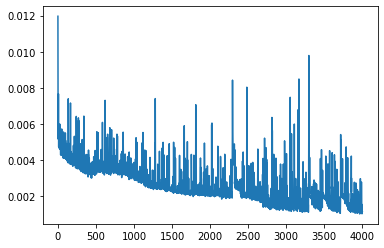

In [237]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [238]:
x = torch.tensor(train_X, dtype=torch.float32)
x_pred = net(x)

In [239]:
torch.save(net, 'mymodel.pt')

In [240]:
torch.save(net.state_dict(), 'weights.pt')

In [241]:
x_pred[x_pred>=0.5]=1
x_pred[x_pred<0.5]=0

In [242]:
x_pred.view(435)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [243]:
torch.tensor(train_y.to_numpy(), dtype=torch.float32)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [244]:
print(
    classification_report(train_y.to_numpy(), x_pred.view(435).detach())
)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       425
         1.0       1.00      0.90      0.95        10

    accuracy                           1.00       435
   macro avg       1.00      0.95      0.97       435
weighted avg       1.00      1.00      1.00       435



# 평가

In [245]:
val = torch.tensor(val_X, dtype=torch.float32)
val_pred = net(val)

val_pred[val_pred>=0.5]=1
val_pred[val_pred<0.5]=0

In [246]:
val_pred.view(145)

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.], grad_fn=<ViewBackward0>)

In [247]:
torch.tensor(val_y.to_numpy(),dtype=torch.float32)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.])

In [248]:
print(
    classification_report(val_y.to_numpy(), val_pred.view(145).detach())
)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       142
         1.0       0.25      0.33      0.29         3

    accuracy                           0.97       145
   macro avg       0.62      0.66      0.63       145
weighted avg       0.97      0.97      0.97       145



# 테스트

In [249]:
test = torch.tensor(test_X, dtype=torch.float32)
test_pred = net(test)

test_pred[test_pred>=0.5]=1
test_pred[test_pred<0.5]=0

In [250]:
test_pred.view(146)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0.], grad_fn=<ViewBackward0>)

In [251]:
torch.tensor(test_y.to_numpy(),dtype=torch.float32)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [252]:
print(
    classification_report(test_y.to_numpy(), test_pred.view(146).detach())
)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       144
         1.0       0.00      0.00      0.00         2

    accuracy                           0.97       146
   macro avg       0.49      0.49      0.49       146
weighted avg       0.97      0.97      0.97       146

